In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from posteriordb import PosteriorDatabase

import stan

import nest_asyncio
nest_asyncio.apply()

In [2]:
# Load DataBase Locally
pdb_path = "/home/congye/Code/PythonProjects/LearningAdaptiveMCMC/Python/posteriordb/posterior_database"
my_pdb = PosteriorDatabase(pdb_path)

# Load Dataset
posterior = my_pdb.posterior("test-SimpleEggBox-test-SimpleEggBox")
stan_code = posterior.model.stan_code()
data = {"sigma": 1, "r": 20}

In [3]:
nits = 100_000
posterior = stan.build(stan_code, data=data)
fit = posterior.sample(
    num_chains=1,
    num_samples=nits,
    init=[
        {"x.1": 0, "x.2": 0}
    ]
)
df = fit.to_frame()

Building...



Building: found in cache, done.Messages from stanc:
    provided, or the prior(s) depend on data variables. In the later case,
    this may be a false positive.
Sampling:   0%
Sampling: 100% (101000/101000)
Sampling: 100% (101000/101000), done.
Messages received during sampling:
  Gradient evaluation took 3.9e-05 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.39 seconds.
  Adjust your expectations accordingly!


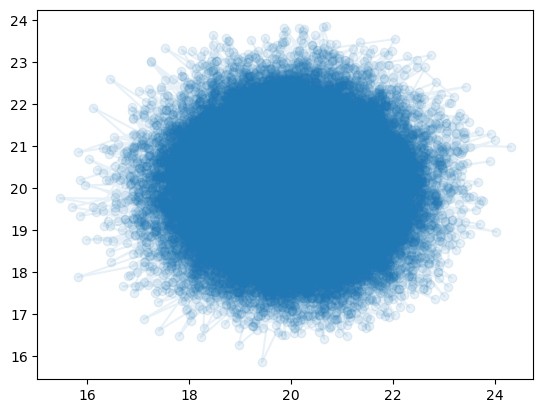

In [4]:
plt.plot(df['x.1'], df['x.2'], 'o-', alpha=0.1)